<div class="clearfix" style="padding: 10px; padding-left: 0px">
<img src="http://spark.apache.org/images/spark-logo-trademark.png" width="150px" class="pull-left" style="display: inline-block; margin: 0px;"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c9/Intel-logo.svg/1200px-Intel-logo.svg.png" width="150px" class="pull-right" style="display: inline-block; margin-left: 10px; margin-top: 5px;"><img src="https://www.telekom.com/resource/image/487426/landscape_ratio4x3/3000/2250/270a7d8b24f8468e073782c70f259250/Dg/bi-telekomcloud-en.gif" width="150px" style="display: inline-block; margin-top: 5px;" class="pull-right">
</div>


# Deep learning-based image recognition
> Powered by **BigDL/Spark** for deep learning, running on **Open Telekom Cloud** and **Intel architecture**

<img src="https://d0.awsstatic.com/product-marketing/Rekognition/Label-detection.png" width="600px" style="display: inline-block; margin: 0px;|">

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true;
function code_toggle() {
 if(code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the code."></form>''')

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# Test Images

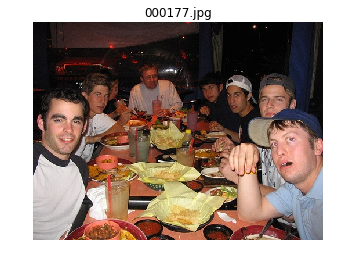

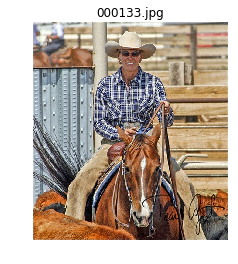

In [3]:
from util.common import *
from models.ssd.util import *
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

init_engine()

# load object class names
with open("/home/linux/ssd/classname.txt") as f:
    classes = f.read().splitlines()

# load and show images
folder = "/home/linux/ssd/test"
imageFiles = os.listdir(folder)
images = []
for f in imageFiles:
    image = mpimg.imread(folder + '/' + f)
    images.append(image)
    plt.imshow(image)
    plt.axis("off")
    plt.title(f)
    plt.show()

# Object detection Result

Loading object detection model...
Model Loaded
Detect objects in given pictures
Detection done


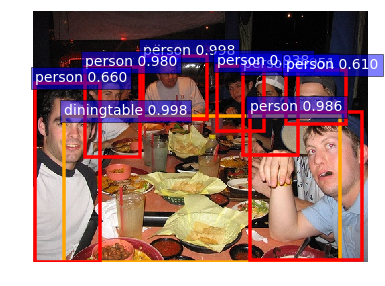

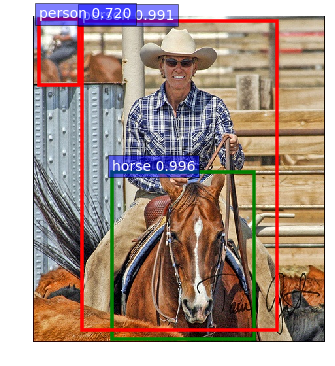

In [4]:
# load model
print 'Loading object detection model...'
model = Model.from_path("/home/linux/test.bigdl")
print 'Model Loaded'

# predict objects with scores
batch_size = 1
n_partition = 6
print 'Detect objects in given pictures'
result = predict(batch_size, n_partition, folder, sc, model, len(classes))
print 'Detection done'

colors={'person': 'red', 'horse': 'green', 'diningtable': 'orange'}

for img_id in range(len(result)):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(images[img_id])
    for cls_id in range(len(classes)):
        scores = result[img_id][0][cls_id]
        bboxes = result[img_id][1][cls_id]
        if scores is None:
            continue
        for i in range(len(scores)):
            if (scores[i] <= 0.6):
                continue
            ax.add_patch(
            plt.Rectangle((bboxes[i*4], bboxes[i*4+1]),
                          bboxes[i*4+2] - bboxes[i*4],
                          bboxes[i*4+3] - bboxes[i*4+1], fill=False,
                          edgecolor=colors[classes[cls_id]], linewidth=3.5)
            )
            ax.text(bboxes[i*4], bboxes[i*4+1] - 2,
                '{:s} {:.3f}'.format(classes[cls_id], scores[i]),
                bbox=dict(facecolor='blue', alpha=0.5),
                fontsize=14, color='white')
    plt.axis('off')
    plt.show()